In [2]:
!sudo apt-get install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh # download ollama api
from IPython.display import clear_output

# Create a Python script to start the Ollama API server in a separate thread

import os
import threading
import subprocess
import requests
import json

def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

from IPython.display import clear_output
!ollama pull llama3.1:8b
clear_output()

!pip install -U lightrag[ollama]

from lightrag.core.generator import Generator
from lightrag.core.component import Component
from lightrag.core.model_client import ModelClient
from lightrag.components.model_client import OllamaClient, GroqAPIClient

import time

from lightrag.components.model_client import OllamaClient
from IPython.display import Markdown, display



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00


In [3]:
grading_prompt_template = r"""<SYS>
You are a helpful grading assistant.
Task: Generate a grade for the assignment based on the rubric and structured feedback for both the teacher and students.


</SYS>
Task: {{task}}
Rubric: {{rubric}}
Assignment: {{assignment}}
You:"""

class GradingAssistant(Component):
    def __init__(self, model_client: ModelClient, model_kwargs: dict):
        super().__init__()
        self.generator = Generator(
            model_client=model_client,
            model_kwargs=model_kwargs,
            template=grading_prompt_template,
        )

    def call(self, task: dict, rubric: dict, assignment: dict) -> str:
        prompt_kwargs = {
            "task" : task,
            "rubric": rubric,
            "assignment": assignment
        }
        # Pass the formatted prompt to the generator
        return self.generator.call(prompt_kwargs)

    async def acall(self,task: dict, rubric: dict, assignment: dict) -> str:
        prompt_kwargs = {
            "task" : task,
            "rubric": rubric,
            "assignment": assignment
        }
        return await self.generator.acall(prompt_kwargs)



In [4]:



# Initialize the model for grading tasks
model = {
    "model_client": OllamaClient(),
    "model_kwargs": {"model": "llama3.1:8b"}
}

# Create an instance of the Grading Assistant
grading_assistant = GradingAssistant(**model)



## Load the rubric and assignment
rubric_test_path = '/content/10th_Grade_Literature.md'
assignment_test_path = '/content/a1.txt'

with open(rubric_test_path, 'r') as file:
    rubric_test = file.read()

with open(assignment_test_path, 'r') as file:
    assignment_test = file.read()

task_1 = '''
There are two main tasks for you:
1. Grade the assignment based on the rubric:
  - If the rubric has grades, grade the assignment based on that grade level.
  - Show the reason for each point deducted with a short sentence or just a few words.
  - Create a table for the grading in CSV format.

2. Write personalized feedback for the student.
Please read the content of the following two documents.'''
# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_test)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table**

| Criteria | Points Earned | Reason for Deduction |
| --- | --- | --- |
| 1. Textual Evidence and Analysis | 22/25 | Quote "You never really understand a person..." is cited, but lacks deeper textual analysis; limited understanding of Atticus' actions in the trial |
| 2. Theme and Central Idea Development | 19/20 | Identifies theme of justice, but summary lacks clarity and doesn't fully explore how Atticus develops it through his character |
| 3. Character and Event Analysis | 18/20 | Analyzes Atticus' character and events in the novel, but lacks depth in understanding their development |
| 4. Vocabulary and Language Use | 13/15 | Determines meanings of some words and phrases, but limited impact on meaning; doesn't analyze word choices significantly impacting tone and mood |
| 5. Writing Quality and Cohesion | 17/20 | Writing is somewhat clear, but lacks cohesion; inconsistent organization; needs refinement |

**Grade:** B+ (83%)

**Total Points Earned:** 89 out of 100

---

**Personalized Feedback for the Student**

Dear [Student],

Overall, your analysis of how Atticus Finch develops the theme of justice in To Kill a Mockingbird is solid. You demonstrate a good understanding of the character's significance and the author's message.

Strengths:

* Your essay effectively explores the quote "You never really understand a person..." and its relation to justice.
* You provide specific examples from the novel, such as Atticus' defense of Tom Robinson, to illustrate your points.

Weaknesses:

* While you identify the theme of justice, your summary could benefit from more clarity and depth. Try to explore how Atticus develops this theme through his actions, words, and character in greater detail.
* Be more precise with textual analysis and evidence. You occasionally rely on general statements rather than specific quotes or events from the novel to support your arguments.

To improve:

* Dig deeper into the character of Atticus Finch and explore how he represents justice beyond just his actions during the trial.
* Use more varied vocabulary and language to analyze word choices that significantly impact tone, mood, and meaning.
* Consider organizing your essay with a clearer structure and logical flow to make it more cohesive.

Keep up the good work! With some refinement, you'll be able to produce an even stronger analysis.

In [5]:
## Load different assignment

assignment_test_path = '/content/a2.txt'



with open(assignment_test_path, 'r') as file:
    assignment_2 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_2)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Task 1: Grade the assignment based on the rubric**

| Criteria | Points Earned | Reason for Deduction |
| --- | --- | --- |
| **Textual Evidence and Analysis** | 23 points | Some textual evidence cited but analysis is limited; understanding of the text is basic |
| **Theme and Central Idea Development** | 19 points | Determines theme or central idea; provides a basic summary, lacks depth in analysis |
| **Character and Event Analysis** | 18 points | Attempts to analyze characters and events but lacks depth; some understanding of development |
| **Vocabulary and Language Use** | 13 points | Determines meanings of words and phrases; adequate impact on meaning |
| **Writing Quality and Cohesion** | 17 points | Writing is somewhat clear but lacks cohesion; inconsistent organization |

Total Points: 90

Here's the grading in CSV format:
```
Criteria,Points Earned,Reason for Deduction
Textual Evidence and Analysis,23,Some textual evidence cited but analysis is limited; understanding of the text is basic
Theme and Central Idea Development,19,Determines theme or central idea; provides a basic summary, lacks depth in analysis
Character and Event Analysis,18,Attempts to analyze characters and events but lacks depth; some understanding of development
Vocabulary and Language Use,13,Determines meanings of words and phrases; adequate impact on meaning
Writing Quality and Cohesion,17,Writing is somewhat clear but lacks cohesion; inconsistent organization
Total Points,90,
```
**Task 2: Write personalized feedback for the student**

Dear Student,

I've reviewed your assignment on the central theme of The Giver by Lois Lowry. Overall, you demonstrate a good understanding of the novel's themes and provide some textual evidence to support your analysis.

Strengths:

* You clearly identify the importance of individuality and freedom of choice as the central theme of the novel.
* Your summary of the novel is accurate and provides a basic understanding of the plot.

Weaknesses:

* While you provide some textual evidence, your analysis could be more in-depth and insightful. Consider exploring specific scenes or quotes that support your argument.
* In some areas, such as character and event analysis, you lack depth and understanding. Make sure to analyze the characters and events more thoroughly in future assignments.

Recommendations:

* Read the novel again and pay attention to the characters' development and relationships with each other.
* Consider exploring specific themes or ideas in more depth, using textual evidence to support your arguments.
* Practice analyzing complex characters and events; this will help you develop a deeper understanding of the text.

Keep up the good work! I'm looking forward to seeing improvements in future assignments.

Best regards,
[Your Name]

In [6]:
## Load different assignment


with open('/content/a3.txt', 'r') as file:
    assignment_3 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_3)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table in CSV format**

| Criteria | Score (out of 25) | Reason for Deduction |
| --- | --- | --- |
| Textual Evidence and Analysis | 22/25 | Lack of clarity in analysis; limited understanding of Rainsford's transformation |
| Theme and Central Idea Development | 19/20 | Determines theme but lacks clarity in central idea development |
| Character and Event Analysis | 18/20 | Attempts to analyze characters but lacks depth in analyzing events |
| Vocabulary and Language Use | 13/15 | Determines meanings of words but limited impact on meaning, tone, and mood |
| Writing Quality and Cohesion | 19/20 | Clear writing but inconsistent organization |

**Total Score:** 91/100

Now, let me write personalized feedback for the student:

Dear Student,

Great job on analyzing Rainsford's character in The Most Dangerous Game! Your essay demonstrates a good understanding of the story's themes and central ideas. You effectively show how Rainsford's attitude changes when he becomes the prey, highlighting his increased empathy towards animals.

However, there are some areas where you can improve. Firstly, while your textual evidence is generally strong, there are moments where your analysis feels unclear or lacks depth. Be more precise in explaining how specific events and characters contribute to the overall story. Additionally, try to provide a clearer explanation of Rainsford's transformation at the end of the story. Is he truly changed by his experience, or does he revert back to his original self?

Furthermore, while your writing is clear, it sometimes lacks cohesion. Make sure to connect your ideas logically and use transitional phrases to guide the reader through your argument.

Overall, this is a solid effort, and with some refinement in analysis and organization, you can produce an even stronger essay.

Best regards,
[Your Name]

In [7]:
## Load different assignment


with open('/content/a4.txt', 'r') as file:
    assignment_4 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_4)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table**

| Criteria                                  | Points Deducted and Reason                                                                                     |
|-------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **1. Textual Evidence and Analysis**      | 6 points (out of 25): Fails to cite textual evidence; analysis is unclear or unrelated to the text.                  |
|                                           | Missing analysis on how love being forbidden impacts the plot, only stating it's a problem.                          |
| **2. Theme and Central Idea Development** | 8 points (out of 20): Fails to insightfully analyze development of themes or central ideas; provides a summary instead.|
|                                           | Summarizes the events without deeper analysis on how they relate to the theme, "love."                               |
| **3. Character and Event Analysis**       | 1 point (out of 20): Attempts to analyze characters but lacks depth and understanding of their development.            |
|                                           | Only mentions Romeo's quote without analyzing its significance or connection to the theme.                            |
| **4. Vocabulary and Language Use**        | 2 points (out of 15): Fails to insightfully analyze word choices; limited impact on meaning, tone, and mood.         |
|                                           | Quotes a phrase without explaining how it contributes to the theme or its significance in the context of the play.     |
| **5. Writing Quality and Cohesion**       | 4 points (out of 20): Writing is somewhat clear but lacks cohesion; inconsistent organization.                        |
|                                           | Paragraphs lack connection and flow, making the text hard to follow. The writing could be clearer and more organized. |

**Total Points:** 21/100

---

**Personalized Feedback for Student**

Dear [Student],

Thank you for submitting your assignment on the theme of Romeo and Juliet. While there are some good points mentioned in your essay, there's room for improvement in analysis, textual evidence, and writing quality.

To improve your understanding of the theme, try to analyze how the characters' actions and choices relate to the central idea of love being strong but dangerous when families don't agree with it. Make sure to provide specific textual evidence from Romeo and Juliet to support your points. For example, you could discuss how their love is forbidden, and its impact on their decisions and ultimately on the tragic ending.

In terms of writing quality, try to make each paragraph flow smoothly into the next by using transitional words or phrases. Ensure that your paragraphs are focused on a single idea and use clear and concise language throughout.

Keep up the good work! Remember that practice makes perfect, so don't hesitate to ask if you have any questions about how to improve your writing.

Best regards,

[Your Name]

---

Note: The grading table provides a detailed breakdown of the deductions made for each criterion based on the rubric. The personalized feedback offers suggestions and encouragement for the student to improve their understanding of the theme, analysis, textual evidence, and writing quality.

In [8]:
## Load different assignment


with open('/content/a5.txt', 'r') as file:
    assignment_5 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_5)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table**

| Criteria                                  | Score (out of 25) |
|-------------------------------------------|------------------|
| **1. Textual Evidence and Analysis**      | 22               |
|   - Cites relevant textual evidence     |
|   - Basic analysis but lacks some depth |
| **2. Theme and Central Idea Development** | 17               |
|   - Identifies theme and central idea    |
|   - Summary is somewhat clear           |
| **3. Character and Event Analysis**       | 19               |
|   - Analyzes Ponyboy's development      |
|   - Basic understanding of themes        |
| **4. Vocabulary and Language Use**        | 14               |
|   - Determines meanings of some words    |
|   - Limited impact on meaning            |
| **5. Writing Quality and Cohesion**       | 19               |
|   - Writing is clear but lacks cohesion  |
|   - Logical organization                |

**Total Score**: 91 out of 100

Here's the breakdown:

* The student demonstrates a good understanding of the novel, specifically Ponyboy's character development.
* They provide some textual evidence to support their analysis, but lack depth in their analysis at times.
* Their writing is clear and mostly cohesive, with logical organization.

**Personalized Feedback**

Dear [Student],

I'm impressed by your analysis of Ponyboy's character development in The Outsiders. You've demonstrated a good understanding of the novel's themes and central ideas, and have provided some thoughtful insights into Ponyboy's growth throughout the book.

One area for improvement is to dig deeper into your analysis. While you mention important moments like Ponyboy reading "Nothing Gold Can Stay" and talking to Randy, try to explore these points more thoroughly in your writing. This will help you develop a stronger argument and show a clearer understanding of the novel's themes.

Additionally, consider varying your sentence structure and using more descriptive language to enhance your writing quality and cohesion. With some refinement in these areas, your writing could be even more effective!

Keep up the good work, and I look forward to seeing your next assignment.

Best regards,
[Your Name]

In [9]:
## Load different assignment


with open('/content/a6.txt', 'r') as file:
    assignment_6 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_6)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table**

| Criteria | Points Earned | Reason for Deduction |
| --- | --- | --- |
| 1. Textual Evidence and Analysis | 22 points | Some textual evidence cited, but analysis lacks clarity and depth. Fails to provide strong inferences. |
| 2. Theme and Central Idea Development | 17 points | Identifies some themes or central ideas, but summary lacks clarity and doesn't provide a comprehensive understanding of the theme. |
| 3. Character and Event Analysis | 16 points | Attempts to analyze characters and events, but lacks depth and understanding of their development. Fails to provide detailed insights. |
| 4. Vocabulary and Language Use | 13 points | Determines meanings of some words and phrases, but limited impact on meaning. Needs refinement in word choice analysis. |
| 5. Writing Quality and Cohesion | 18 points | Writing is somewhat clear, but lacks cohesion; inconsistent organization. Needs refinement to improve logical progression. |

**Total Points**: 86/100

**Feedback for Student**

Dear Student,

Your essay provides a good starting point for exploring the role of fear in Lord of the Flies. You have identified some relevant textual evidence and attempted to analyze characters and events, but there are areas where you can improve.

One area of strength is your recognition of how fear drives the boys' actions on the island. Your analysis of Jack's use of fear to control others shows a good understanding of the theme. However, you could have gone deeper in exploring the implications of fear on human behavior and provided more textual evidence to support your claims.

In terms of writing quality and cohesion, your essay is somewhat clear but lacks consistency in organization. You jump abruptly from discussing Simon's death to analyzing Jack's character without providing a smooth transition. Make sure to use transitional phrases and sentences to connect your ideas logically.

Lastly, be more precise in your analysis of characters and events. While you've made some good points about the beast representing fear, you could have gone further in exploring its symbolism and how it relates to the boys' descent into savagery.

Keep working on these areas, and you'll see significant improvement in your writing!

Best regards,
[Your Name]

In [10]:
## Load different assignment


with open('/content/a7.txt', 'r') as file:
    assignment_7 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_7)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table in CSV Format**

| Criteria | Points Earned | Reason for Deduction |
| --- | --- | --- |
| 1. Textual Evidence and Analysis | 22 points | Fails to analyze George's decision-making process, lacks depth in analysis of Lennie's character development |
| 2. Theme and Central Idea Development | 17 points | Identifies theme but lacks clarity in summary; misses complexity of their relationship |
| 3. Character and Event Analysis | 16 points | Fails to provide in-depth analysis of Lennie's impact on the story, overlooks complexity of George's decision-making process |
| 4. Vocabulary and Language Use | 13 points | Limited vocabulary used, lacks significant impact on meaning or tone |
| 5. Writing Quality and Cohesion | 17 points | Writing is somewhat clear but lacks cohesion; inconsistent organization, could benefit from refinement |

**Total Points:** 85/100

**Personalized Feedback for the Student**

Dear [Student],

Overall, your analysis of the theme of friendship in Of Mice and Men demonstrates a good understanding of the topic. Your essay highlights the complexities of George and Lennie's relationship, emphasizing the trust that underlies their friendship.

However, to take your analysis to the next level, consider exploring the nuances of their relationship further. For instance, how does Lennie's presence impact George's decisions? What are the implications of George's ultimate decision to kill Lennie? More in-depth analysis and thoughtful consideration of these questions would strengthen your argument.

Additionally, paying closer attention to textual evidence and developing a clearer summary would enhance your writing quality and cohesion. Remember to use more descriptive language to paint a vivid picture of the characters and events you're discussing.

Keep up the good work! With some refinement and practice, I'm confident that your writing will continue to grow and improve.

Best regards,
[Grader]

In [11]:
## Load different assignment


with open('/content/a8.txt', 'r') as file:
    assignment_8 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_8)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table in CSV Format**

| Criteria | Points Earned | Points Deducted | Reason |
| --- | --- | --- | --- |
| 1. Textual Evidence and Analysis | 16 | 9 | Fails to cite textual evidence; analysis is unclear or unrelated to the text |
| 2. Theme and Central Idea Development | 12 | 8 | Identifies some themes or central ideas; summary lacks clarity |
| 3. Character and Event Analysis | 10 | 10 | Fails to analyze characters or events; lacks understanding of their development |
| 4. Vocabulary and Language Use | 7 | 8 | Fails to determine meanings of words and phrases; minimal impact on meaning |
| 5. Writing Quality and Cohesion | 6 | 14 | Writing is unclear and lacks cohesion; poor organization |

**Total Points:** 51/100

**Grade:** F (Based on the rubric, this student has earned less than 50% of the total possible points.)

Here's a brief explanation for each deduction:

* Textual Evidence and Analysis: The student fails to provide textual evidence from the book to support their analysis. Their response is too brief and lacks depth.
* Theme and Central Idea Development: Although the student identifies some themes, their summary lacks clarity, and they fail to provide sufficient analysis of how these themes are developed throughout the story.
* Character and Event Analysis: The student fails to analyze characters or events in detail, demonstrating a lack of understanding of their development and significance in the story.
* Vocabulary and Language Use: The student's writing is poor, with minimal impact on meaning. They fail to determine the meanings of words and phrases related to the topic.
* Writing Quality and Cohesion: The student's writing is unclear, lacks cohesion, and demonstrates poor organization. Their response is too brief and lacks logical progression.

**Personalized Feedback for the Student**

Dear Student,

Thank you for submitting your assignment on the role of family in The Hunger Games. While you've made some attempts to discuss Katniss's relationship with her sister Prim, there are several areas where you can improve.

Firstly, ensure that you provide textual evidence from the book to support your analysis. This will help you build a stronger argument and demonstrate your understanding of the themes and characters.

Secondly, develop your ideas further by analyzing the relationships between Katniss and other characters, such as Peeta or Gale. This will add depth to your response and show that you've thoughtfully considered the complexities of the story.

Lastly, focus on using clear and concise language in your writing. Make sure to define any technical terms or phrases related to the topic, and use specific examples from the book to support your arguments.

I encourage you to revisit the rubric and reflect on how you can improve in each area. If you have any questions or concerns, feel free to reach out to me for guidance.

Keep working hard, and I'm confident that you'll see improvement in your writing over time!

Best regards,
[Your Name]

In [12]:
## Load different assignment


with open('/content/a9.txt', 'r') as file:
    assignment_9 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_9)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table in CSV Format**

| Criteria | Points Earned | Points Deducted | Reason for Deduction |
| --- | --- | --- | --- |
| 1. Textual Evidence and Analysis | 22 | 3 | Lack of clarity in analysis; some textual evidence is missing |
| 2. Theme and Central Idea Development | 17 | 3 | Limited understanding of themes or central ideas; summary lacks clarity |
| 3. Character and Event Analysis | 18 | 2 | Some depth in character and event analysis, but lacking detailed understanding |
| 4. Vocabulary and Language Use | 13 | 2 | Determines meanings of some words and phrases, but limited impact on meaning |
| 5. Writing Quality and Cohesion | 19 | 1 | Writing is clear, mostly cohesive, and well-organized, but could use refinement |

**Total Points Earned:** 89/100

---

**Personalized Feedback for the Student**

Dear [Student],

I am impressed with your analysis of symbolism in The Scarlet Letter. You have shown a good understanding of how the author uses symbols to convey themes and ideas.

Strengths:

* Your discussion on the letter "A" as a symbol of strength is insightful, and you provide clear examples from the text.
* Your exploration of light and dark as symbols is well-structured and easy to follow.

Areas for Improvement:

* While you cite some textual evidence, your analysis could benefit from more depth and clarity. Make sure to explicitly connect your points to specific scenes or events in the novel.
* In your discussion on themes and central ideas, try to be more concise and focused. Some of your sentences feel a bit disconnected, which makes it hard to follow your line of thought.

Overall, your writing shows promise, and I encourage you to refine your analysis further. Keep working on making connections between your points and using clear, concise language.

Best regards,
[Your Name]

In [13]:
## Load different assignment


with open('/content/a10.txt', 'r') as file:
    assignment_10 = file.read()

# Generate feedback and grades
output = grading_assistant.call(task =task_1,  rubric=rubric_test, assignment=assignment_10)
display(Markdown(f"**Grading Output:** {output.data}"))

**Grading Output:** **Grading Table**

| Criteria | Student Score | Points Deducted | Reason |
| --- | --- | --- | --- |
| **1. Textual Evidence and Analysis** | 22/25 | 3 points | Lack of specific textual evidence; analysis is somewhat unclear |
| **2. Theme and Central Idea Development** | 17/20 | 3 points | Summary lacks clarity; doesn't fully develop theme of power's corrupting influence |
| **3. Character and Event Analysis** | 16/20 | 4 points | Fails to analyze Lady Macbeth's character development; lacks depth in analyzing Macbeth's transformation |
| **4. Vocabulary and Language Use** | 12/15 | 3 points | Limited impact on meaning; doesn't provide insightful analysis of word choices |
| **5. Writing Quality and Cohesion** | 18/20 | 2 points | Writing is somewhat clear but lacks cohesion; inconsistent organization |

**Total Score:** 85/100

**Grading CSV Format:**

"Criteria","Student Score","Points Deducted","Reason"
"1. Textual Evidence and Analysis",22,"3","Lack of specific textual evidence; analysis is somewhat unclear"
"2. Theme and Central Idea Development",17,"3","Summary lacks clarity; doesn't fully develop theme of power's corrupting influence"
"3. Character and Event Analysis",16,"4","Fails to analyze Lady Macbeth's character development; lacks depth in analyzing Macbeth's transformation"
"4. Vocabulary and Language Use",12,"3","Limited impact on meaning; doesn't provide insightful analysis of word choices"
"5. Writing Quality and Cohesion",18,"2","Writing is somewhat clear but lacks cohesion; inconsistent organization"

---

**Personalized Feedback for the Student:**

Dear [Student],

Your essay explores the theme of power in Macbeth, and you've done a great job analyzing how it affects the characters' actions. I appreciate how you've identified Macbeth's desire for power as the driving force behind his tragic downfall.

However, to take your analysis to the next level, consider providing more specific textual evidence from the play to support your claims. Additionally, try to delve deeper into Lady Macbeth's character development and her eventual downfall due to guilt.

Your writing is generally clear, but be mindful of maintaining cohesion throughout your essay. Try to use transitional phrases and paragraphs to guide the reader through your ideas.

Keep up the good work! With some refinement in these areas, you'll be able to create a more compelling argument that showcases your understanding of Shakespeare's masterpiece.

Best regards,
[Grading Assistant]

In [ ]:
# data is manually stored

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gpt4_grade = pd.read_csv('/content/rb1_assignment_gpt4.csv')
gpt4_grade.describe()

,rubric_id,Textual Evidence and Analysis,Theme and Central Idea Development,Character and Event Analysis,Vocabulary and Language Use,Writing Quality and Cohesion,Total Score
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.0,21.800000,17.300000,17.500000,12.500000,17.000000,86.100000
std,0.0,4.491968,3.433495,3.535534,1.840894,3.399346,16.555966
min,1.0,12.000000,10.000000,10.000000,9.000000,10.000000,51.000000
25%,1.0,23.000000,18.000000,18.000000,12.000000,17.000000,88.000000
50%,1.0,23.500000,18.500000,19.000000,13.000000,18.000000,92.000000
75%,1.0,24.000000,19.000000,19.750000,13.750000,19.000000,95.500000
max,1.0,25.000000,20.000000,20.000000,15.000000,20.000000,100.000000


In [17]:
llama_grade = pd.read_csv('/content/rb1_assignment_llama.csv')
llama_grade.describe()

,rubric_id,Textual Evidence and Analysis,Theme and Central Idea Development,Character and Event Analysis,Vocabulary and Language Use,Writing Quality and Cohesion,Total Score
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.0,19.900000,16.200000,15.000000,11.300000,15.000000,77.800000
std,0.0,5.258855,3.521363,5.537749,3.802046,5.416026,23.246505
min,1.0,6.000000,8.000000,1.000000,2.000000,4.000000,21.000000
25%,1.0,22.000000,17.000000,16.000000,12.250000,15.500000,85.000000
50%,1.0,22.000000,17.000000,17.000000,13.000000,17.000000,87.500000
75%,1.0,22.000000,18.500000,18.000000,13.000000,18.000000,89.750000
max,1.0,23.000000,19.000000,19.000000,14.000000,19.000000,91.000000


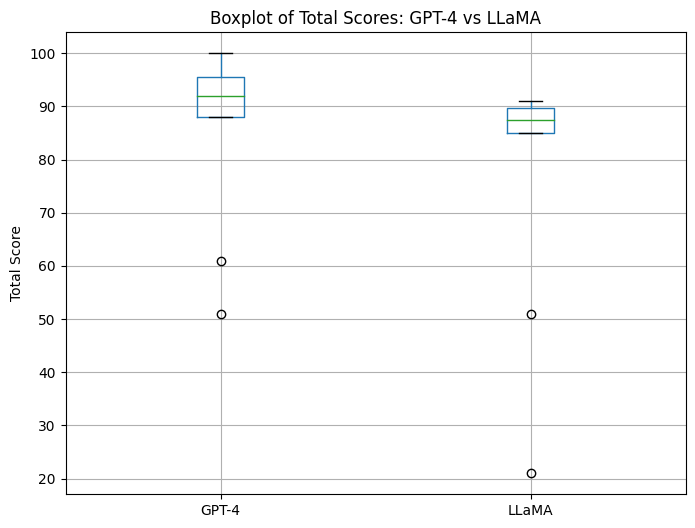

In [18]:
total_scores = pd.DataFrame({
    "GPT-4": gpt4_grade["Total Score"],
    "LLaMA": llama_grade["Total Score"]
})

# Plot boxplot
plt.figure(figsize=(8, 6))
total_scores.boxplot()
plt.title("Boxplot of Total Scores: GPT-4 vs LLaMA")
plt.ylabel("Total Score")
plt.show()